In [27]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Loading Data

### Commented out Examples

In [28]:
#######  Remove this code ########
##load data examples
# Load the Iris dataset
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

#X = pd.DataFrame(X)
#y = pd.DataFrame(y)

#######  Remove this code ########
# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
# data = pd.read_csv('your_dataset.csv')

##alternatively
# Assume 'target' is the column you want to predict
#X = data.drop('target', axis=1)
#y = data['target']

### Actual Load

In [72]:
# Loading dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
display(data)  ## --> This is a prettier version that print to view dataframes
target_var = 'Survived'
type_of_model = 'Boolean'

X = data.drop(columns=[target_var])
y = data[target_var]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleansing

### Null Variable Checks

In [73]:
### Check to Identify which columns have null values
missing_values = data.isnull().sum()

missing_columns = missing_values[missing_values > 0].index.tolist()
print(f"Columns with missing values: {', '.join(missing_columns)}")
missing_values[missing_values > 0]/data.shape[0] ##percent of data that is missing

Columns with missing values: Age, Cabin, Embarked


Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

### Impute for Missing Data

In [74]:
##impute missing values function with simple and knn imputation methods
# Identify numerical and categorical features

def impute_features(data, impute_type, num_method, cat_method):

    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    if(impute_type == 'simple'):
        # Impute numerical features with median
        numerical_imputer = SimpleImputer(strategy= num_method)
        data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

        # Impute categorical features with the most frequent value
        categorical_imputer = SimpleImputer(strategy= cat_method)
        data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

    if(impute_type == 'knn'): ## --> Use nearest neighbor algorithm
        # Create a LabelEncoder object
        encoders = dict()
        imputer = KNNImputer(n_neighbors=5) 

        for feature in categorical_features:
            encoders[feature] = LabelEncoder()
            data[feature] = encoders[feature].fit_transform(data[feature])
            

        data[categorical_features] = imputer.fit_transform(data[categorical_features])
        data[numerical_features] = imputer.fit_transform(data[numerical_features])

        ## Below code bring back the NaN values. Commented out to be improved, and looked into  
        ## for feature in categorical_features:
        ##    data[feature] = encoders[feature].inverse_transform(data[feature].astype('int'))
        
    return data

In [75]:
# Check for remaining missing values after imputation
## call imputation method
impute_type = 'simple'  ##select simple or knn
num_method  = 'median'
cat_method  = 'most_frequent'
X = impute_features(data =X, impute_type='knn', num_method='median', cat_method='most_frequent')
X =  pd.DataFrame(X)


missing_values_after = X.isnull().sum()
na_values_after = X.isna().sum()
print(f"Missing values after imputation:\n{missing_values_after}")
print(f"\nNaN values after imputation:\n{missing_values_after}")
# Display the first few rows of the imputed dataset
print("\nImputed dataset:")
display(X)

Missing values after imputation:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

NaN values after imputation:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Imputed dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,147.0,2.0
1,2.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,147.0,2.0
3,4.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,147.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,548.0,1.0,27.0,0.0,0.0,101.0,13.0000,147.0,2.0
887,888.0,1.0,303.0,0.0,19.0,0.0,0.0,14.0,30.0000,30.0,2.0
888,889.0,3.0,413.0,0.0,27.2,1.0,2.0,675.0,23.4500,147.0,2.0
889,890.0,1.0,81.0,1.0,26.0,0.0,0.0,8.0,30.0000,60.0,0.0


### Distribution Plots for Sanity

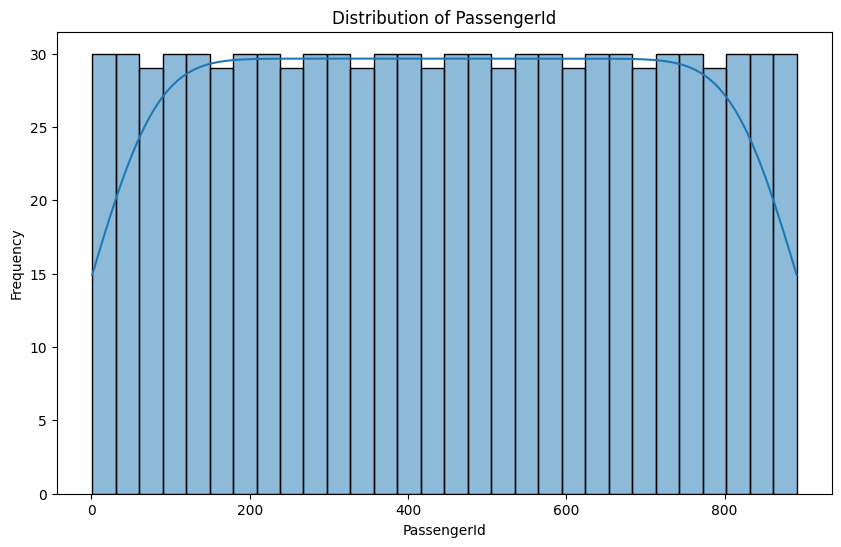

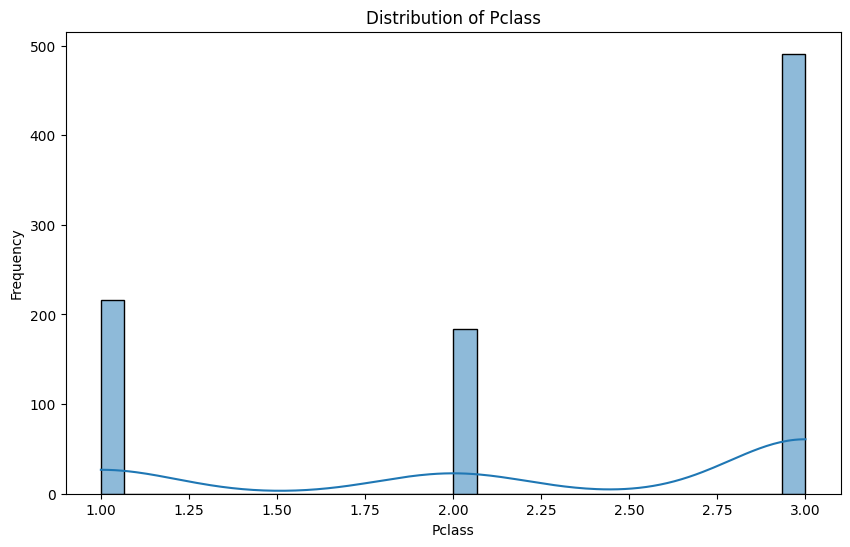

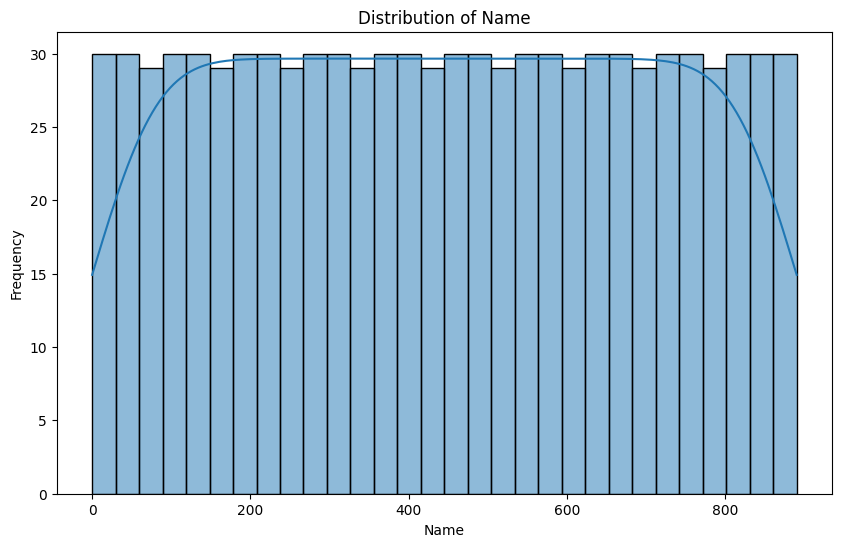

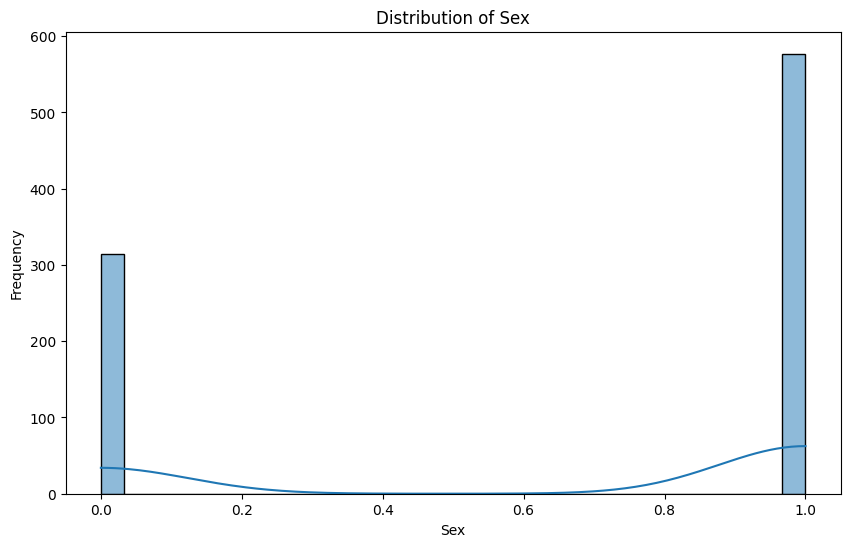

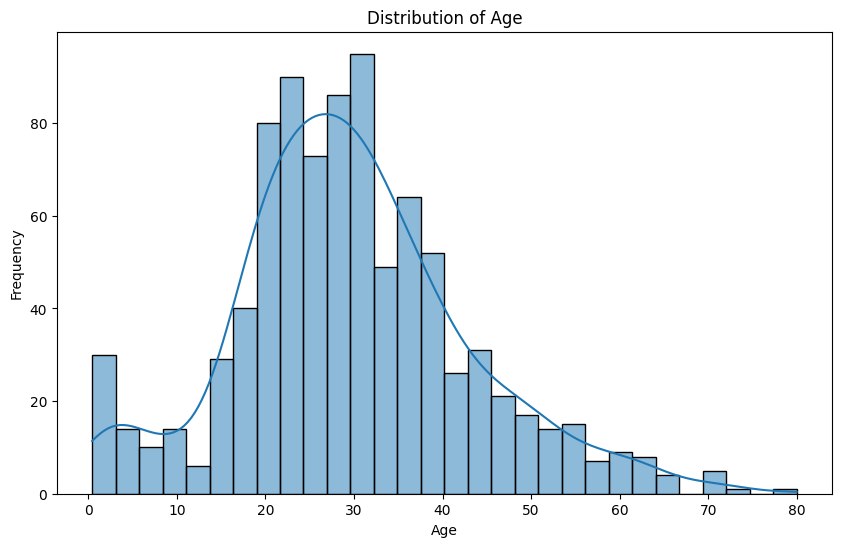

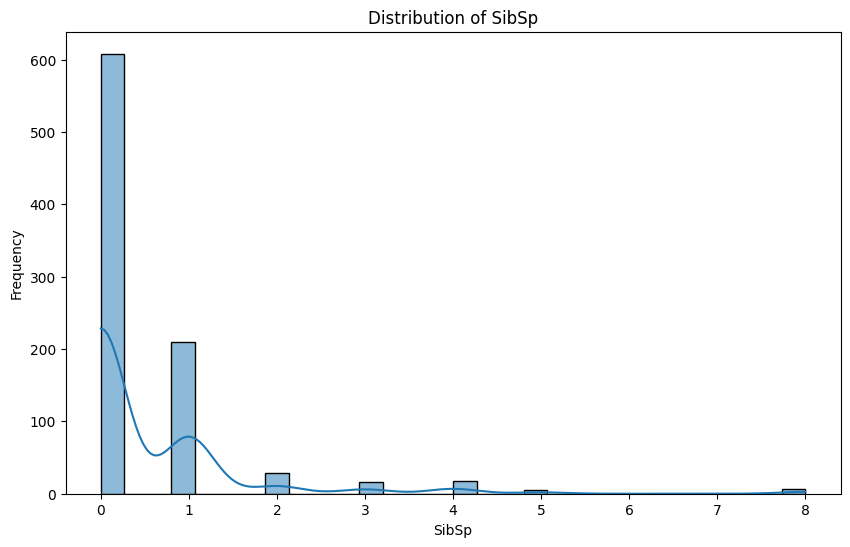

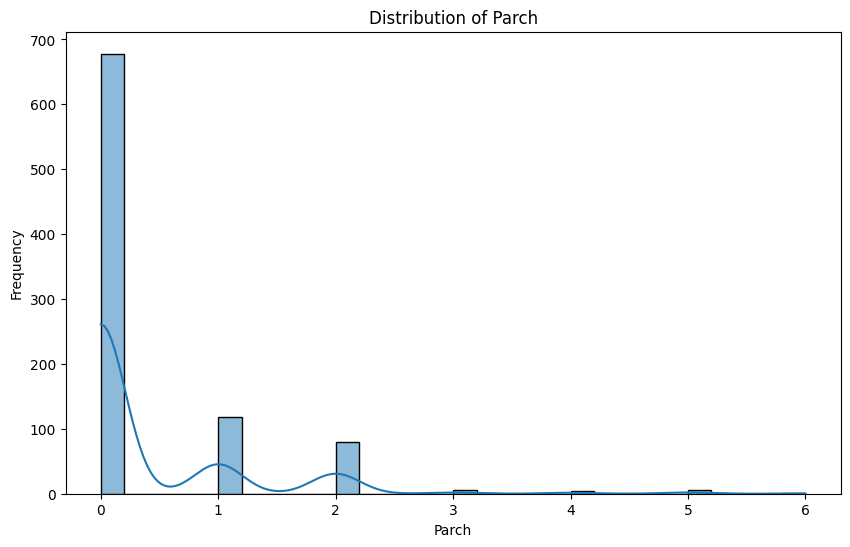

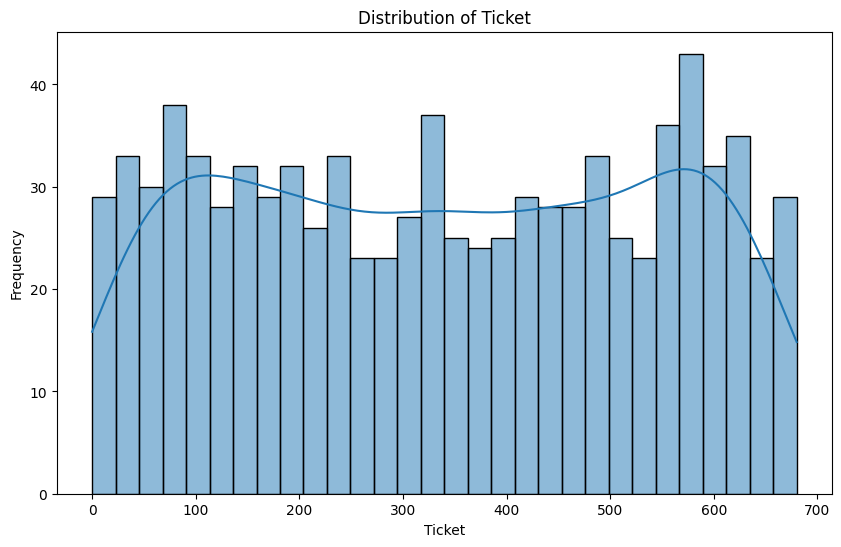

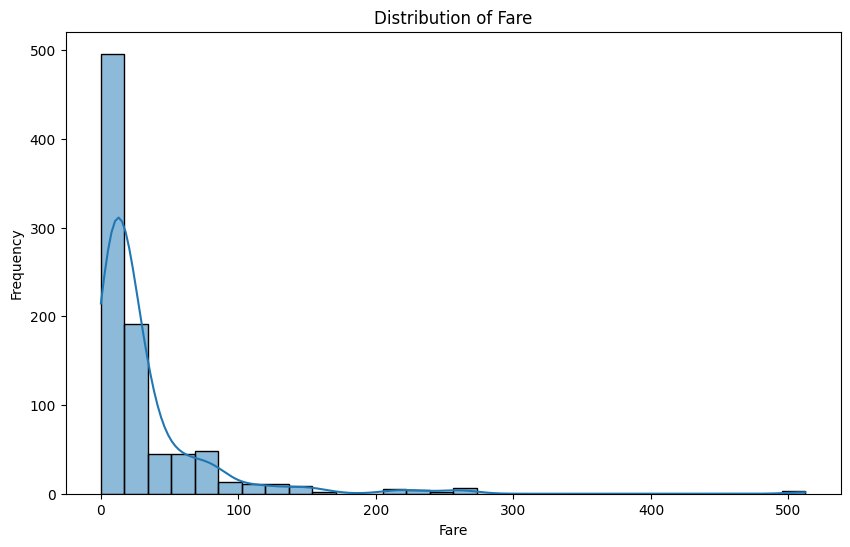

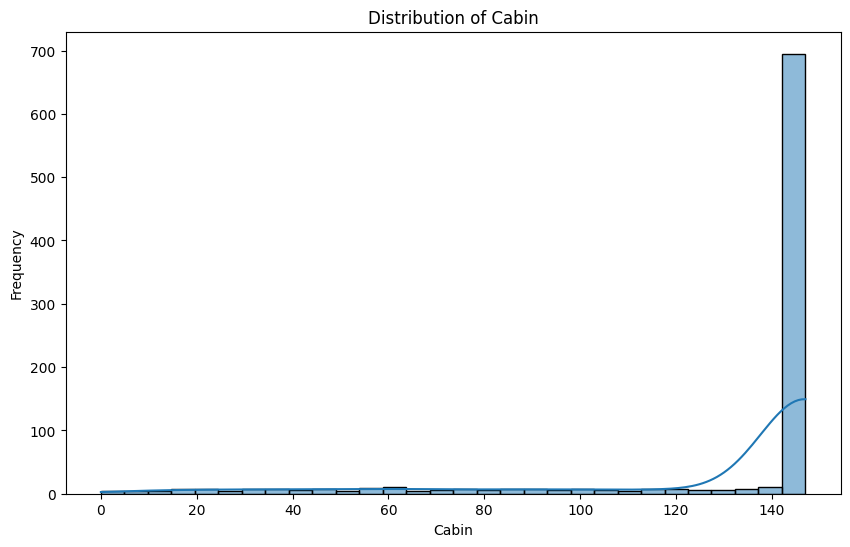

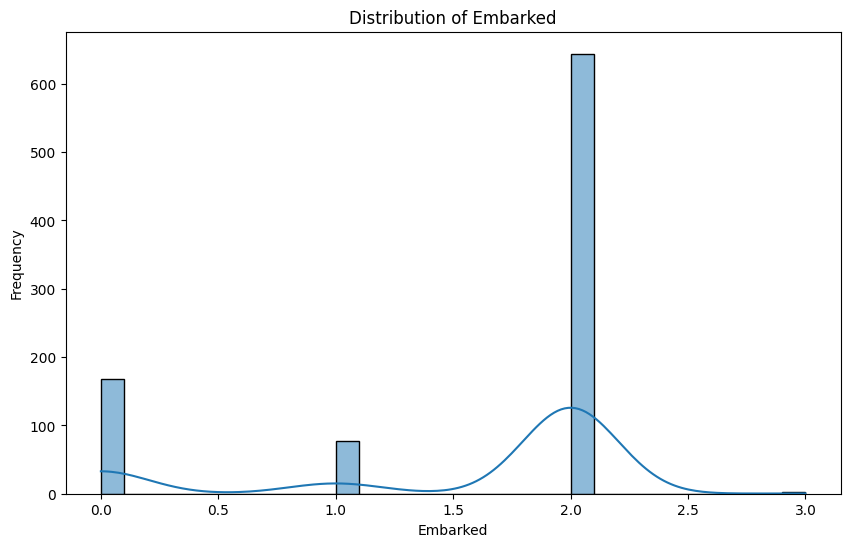

In [76]:
#plot distributions
 # Plot distributions of numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions of categorical features
categorical_features = X.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=X[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


### Remove Unique Identifiers

In [ ]:
##drop any fields like name and ticket number that are unique identifiers
X = X.drop(columns=['Name', 'Ticket', 'PassengerId'])
print(X.head())

### Standardizing Data for Model

In [ ]:
##standardizing the data for the model

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert the result to a DataFrame for easy viewing (optional)
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)

# Display the preprocessed features
print("\nPreprocessed features:\n", X_preprocessed_df.head())




# Split Data for Test/Train 

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


# Modeling Evaluation

In [ ]:
## model evaluation
#Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    ## TODO:  Should incorporate hyper-tuning here
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Compare models
results = {}
for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = accuracy
    print(f"{model_name}: {accuracy:.2f}")

# Show comparison results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nModel Comparison:\n", results_df.sort_values('Accuracy', ascending=False))

# One Off Examples for Other Usage

In [ ]:
##alternatively run 1 model

# Initialize the Random Forest Classifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = LogisticRegression(max_iter=200)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,X_preprocessed_df,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,X_preprocessed_df,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
print(type(data))